# Exercice 3

In [238]:
#import Pkg
#Pkg.add("JuMP")
#Pkg.add("Gurobi")

using JuMP, Gurobi, DataFrames, CSV, Random, LinearAlgebra

In [239]:
#using Pkg
#Pkg.add("PyPlot")
using PyPlot

# Question a

* l0-regularization 

In [240]:
function regularized_regression_l0(y, X, ρ)
    
    M = 10000
    
    n,m = size(X)
    model = Model(solver = GurobiSolver(TimeLimit=45))
    
    @variable(model, β[1:m])
    @variable(model, z[1:m], Bin)
    
    @objective(model, Min, sum((y - X*β).^2) + ρ*sum(z))
    
    for i in 1:m
        @constraint(model, β[i] <= M * z[i])
        @constraint(model, (-β[i]) <= M * z[i])
    end
    
    sol = solve(model)
    
    return (getobjectivevalue(model), getvalue(β))
    
end

regularized_regression_l0 (generic function with 1 method)

In [241]:
y = [143,2,78,219]
X = [1 2 3; 2 4 6; 1 1 1; 2 3 8]
rho = 10
y = [2,4,1,11]
regularized_regression_l0(y,X,rho)

Academic license - for non-commercial use only
Optimize a model with 6 rows, 6 columns and 12 nonzeros
Model has 6 quadratic objective terms
Variable types: 3 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+01, 2e+02]
  QObjective range [2e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Presolve time: 0.01s
Presolved: 6 rows, 6 columns, 12 nonzeros
Presolved model has 6 quadratic objective terms
Variable types: 3 continuous, 3 integer (3 binary)

Root relaxation: objective -1.419930e+02, 17 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -141.99300    0    3    0.00000 -141.99300      -     -    0s
H    0     0                    -111.9999983 -141.99300  26.8%     -    0s
     0     0 -141.99300    0    3

(21.16363659090905, [0.0, -2.199699999999997, 2.1816636363636346])

In [242]:
function regularized_regression_l1(y, X, ρ)
    
    M = 10000
    
    n,m = size(X)
    model = Model(solver = GurobiSolver(TimeLimit=45))
    
    @variable(model, β[1:m])
    @variable(model, z[1:m])
    
    @objective(model, Min, sum((y - X*β).^2) + ρ*sum(z))
    
    for i in 1:m
        @constraint(model, (z[i]) >= β[i])
        @constraint(model, (z[i]) >= - β[i])
    end
    
    sol = solve(model)
    
    return (getobjectivevalue(model), getvalue(β))
    
end

regularized_regression_l1 (generic function with 1 method)

In [243]:
function regularized_regression_l2(y, X, ρ)
    
    M = 10000
    
    n,m = size(X)
    model = Model(solver = GurobiSolver(TimeLimit=45))
    
    @variable(model, β[1:m])
    
    @objective(model, Min, sum((y - X*β).^2) + ρ*sum(β.^2))
    
    sol = solve(model)
    
    return (getobjectivevalue(model), getvalue(β))
    
end

regularized_regression_l2 (generic function with 1 method)

## Question b

In [244]:
sparseX2 = CSV.read("sparseX2.csv")
sparseY2 = CSV.read("sparseY2.csv")

ArgumentError: ArgumentError: "sparseX2.csv" is not a valid file

Creation of the validation, training and testing sets.

In [245]:
function split_data(X, y, val, test)
    n = size(X, 1)
    index = shuffle([i for i in 1:n])
    
    size_validation = floor(Int,val*n)    
    size_test = floor(Int,(val+test)*n)
    
    ind_validation = index[1:size_validation]
    ind_test = index[size_validation+1:size_test]
    ind_train = index[size_test+1:n]
    
    X_validation = X[ind_validation, :]
    X_test = X[ind_test, :]
    X_train = X[ind_train, :]

    y_validation = y[ind_validation, :]
    y_test = y[ind_test, :]
    y_train = y[ind_train, :]
    
    return (
        convert(Matrix,X_validation), 
        convert(Matrix,X_test), 
        convert(Matrix,X_train), 
        convert(Matrix, y_validation), 
        convert(Matrix,y_test),
        convert(Matrix,y_train)
        )
    
end

split_data (generic function with 1 method)

In [246]:
X = [1 1 1; 2 2 2; 3 3 3; 4 4 4]
y = [1; 2; 3; 4]
val = 0.25
test=0.25
split_data(X, y, val, test)

([4 4 4], [2 2 2], [3 3 3; 1 1 1], [4], [2], [3; 1])

In [247]:
(
    X_validation, 
    X_test, 
    X_train, 
    y_validation, 
    y_test,
    y_train
) = split_data(sparseX2, sparseY2, 0.25, 0.25)

([-1.546731741900333 1.107610369079468 … -0.2937388398210462 0.49936029237575696; -0.6315778870329364 0.8698862875353852 … 0.2622269235252903 0.1637404408156757; … ; -0.8143152943766987 2.1896086828053907 … 0.854233709549684 0.7632671291301982; -1.0088599555376034 0.16364495372354845 … -0.3594424679125644 -0.06048302550612279], [-1.626729284162485 -1.0802915526773837 … -0.07270733809796448 0.5004878153397594; -1.5021368491168559 0.05426780703997661 … 1.0057909170043462 0.7158673800078762; … ; -1.326970345062047 1.315845372889509 … -0.007182226335683523 0.5229497030374112; -1.7098682060045913 2.1299921566412503 … 0.41824798687303055 -0.9263087122572096], [-0.9094790180375028 1.0451679003902126 … 0.7989793656624816 0.28572136169685947; 0.459695985041628 0.42889110309176043 … 0.8478103566679067 -0.4377476349285075; … ; -0.6298048032223702 1.194006476255608 … -0.25908718236763306 -0.681539828040532; -0.46408289171823325 -0.5994902973729991 … 0.6700254423878705 0.6787059298192304], [0.41965

We choose ρ as the value that gives the best mean squared prediction error on the validation set.

Mean Square Error

In [248]:
function mean_square_error(y_actual, y_predicted)
    return sum((y_actual - y_predicted).^2)
end

mean_square_error (generic function with 1 method)

In [249]:
function compute_error_l0(ρ, X, y)
    objective, β = regularized_regression_l0(y_train, X_train, ρ)
    error = mean_square_error(y, X * β)
    return error
end

compute_error_l0 (generic function with 1 method)

In [250]:
function compute_error_l1(ρ, X, y)
    objective, β = regularized_regression_l1(y_train, X_train, ρ)
    error = mean_square_error(y, X * β)
    return error
end

compute_error_l1 (generic function with 1 method)

In [251]:
function compute_error_l2(ρ, X, y)
    objective, β = regularized_regression_l2(y_train, X_train, ρ)
    error = mean_square_error(y, X * β)
    return error
end

compute_error_l2 (generic function with 1 method)

In [252]:
ρ_l0 = vcat([0.001, 0.01, 0.1], [i for i=1:30])
errors_l0 = zeros(length(ρ_l0))

for i in 1:length(errors_l0)
    error_l0[i] = compute_error_l0(ρ_l0[i], X_validation, y_validation)
end

Academic license - for non-commercial use only
Optimize a model with 200 rows, 200 columns and 400 nonzeros
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e-03, 3e+02]
  QObjective range [1e-03, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Presolve time: 0.00s
Presolved: 200 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective -1.192561e+03, 1123 iterations, 0.04 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -1192.5605    0   82    0.00000 -1192.5605      -     -    0s
H    0     0                    -1192.478552 -1192.5605  0.01%     -    0s

Ex

Academic license - for non-commercial use only
Optimize a model with 200 rows, 200 columns and 400 nonzeros
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [2e+00, 3e+02]
  QObjective range [1e-03, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Presolve time: 0.00s
Presolved: 200 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective -1.192553e+03, 1123 iterations, 0.03 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -1192.5533    0   80    0.00000 -1192.5533      -     -    0s
H    0     0                    -1035.175283 -1192.5533  15.2%     -    0s
   

Academic license - for non-commercial use only
Optimize a model with 200 rows, 200 columns and 400 nonzeros
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [2e+00, 3e+02]
  QObjective range [1e-03, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Presolve time: 0.00s
Presolved: 200 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective -1.192501e+03, 1125 iterations, 0.03 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -1192.5011    0   77    0.00000 -1192.5011      -     -    0s
H    0     0                    -550.2422522 -1192.5011   117%     -    0s
H  

Academic license - for non-commercial use only
Optimize a model with 200 rows, 200 columns and 400 nonzeros
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [2e+00, 3e+02]
  QObjective range [1e-03, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Presolve time: 0.00s
Presolved: 200 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective -1.192489e+03, 1123 iterations, 0.04 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -1192.4892    0   74    0.00000 -1192.4892      -     -    0s
H    0     0                    -657.2392366 -1192.4892  81.4%     -    0s
H  

Academic license - for non-commercial use only
Optimize a model with 200 rows, 200 columns and 400 nonzeros
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [2e+00, 3e+02]
  QObjective range [1e-03, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Presolve time: 0.00s
Presolved: 200 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective -1.192478e+03, 1121 iterations, 0.04 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -1192.4776    0   73    0.00000 -1192.4776      -     -    0s
H    0     0                    -571.3957649 -1192.4776   109%     -    0s
H  

┌ Warning: Not solved to optimality, status: UserLimit
└ @ JuMP /Users/gabriellerappaport/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: UserLimit
└ @ JuMP /Users/gabriellerappaport/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: UserLimit
└ @ JuMP /Users/gabriellerappaport/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: UserLimit
└ @ JuMP /Users/gabriellerappaport/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: UserLimit
└ @ JuMP /Users/gabriellerappaport/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: UserLimit
└ @ JuMP /Users/gabriellerappaport/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: UserLimit
└ @ JuMP /Users/gabriellerappaport/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Use

BoundsError: BoundsError: attempt to access 30-element Array{Float64,1} at index [31]

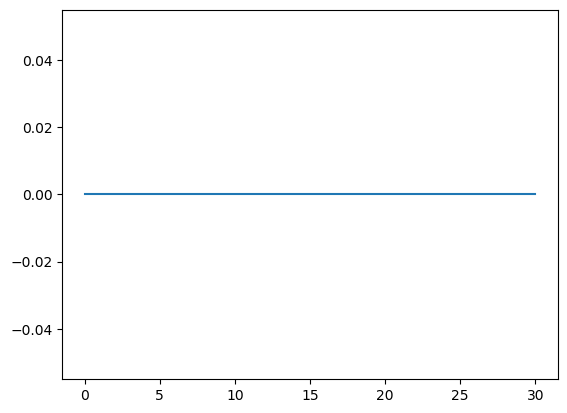

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14d4fca58>

In [253]:
plot(ρ_l0, errors_l0)

In [254]:
ρ_l1 = [i/2 for i=1:60]
errors_l1 = zeros(length(ρ_l1))

for i in 1:length(errors_l1)
    error_l1[i] = compute_error_l1(ρ_l1[i], X_validation, y_validation)
end

Academic license - for non-commercial use only
Optimize a model with 200 rows, 200 columns and 400 nonzeros
Model has 5050 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 3e+02]
  QObjective range [1e-03, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 100 rows and 0 columns
Presolve time: 0.00s
Presolved: 100 rows, 200 columns, 200 nonzeros
Presolved model has 5050 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 199
 AA' NZ     : 9.900e+03
 Factor NZ  : 1.219e+04
 Factor Ops : 1.092e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.00000000e+05  0.00000000e+00  0.00e+00 3.17e+02  1.00e+06     0s
   1   9.87575089e+04 -1.19099004e+03  3.35e-07 1.69e-01  1.03e+03     0s
   2   2.70207572e+04 -1.19239638e+03  4

BoundsError: BoundsError: attempt to access 30-element Array{Float64,1} at index [31]

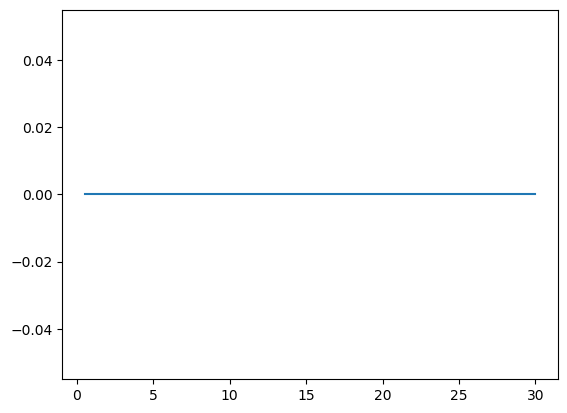

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14ef2fba8>

In [255]:
plot(ρ_l1, errors_l1)    

In [256]:
ρ_l0 = vcat([0.001, 0.01, 0.1], [i for i=1:20])
errors_l2 = zeros(length(ρ_l2))

for i in 1:length(errors_l2)
    error_l2[i] = compute_error_l2(ρ_l2[i], X_validation, y_validation)
end

UndefVarError: UndefVarError: ρ_l2 not defined

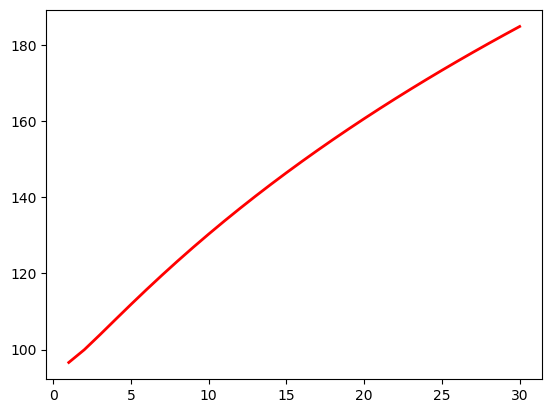

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14ef49160>

In [257]:
plot(rho_test, error_l2, color="red", linewidth=2.0)  

Compute ∥y − Xβ∥2 on the testing set using the β’s from l0-regularized, l1-regularized linear regression, l2- regularized linear regression, and standard linear regression (ρ = 0)

In [258]:
l0_error = compute_error_l0(rho_l0, test_set, test_set_output)

UndefVarError: UndefVarError: rho_l0 not defined

In [259]:
l1_error = compute_error_l1(rho_l1, test_set, test_set_output)

UndefVarError: UndefVarError: rho_l1 not defined

In [260]:
l2_error = compute_error_l2(rho_l2, test_set, test_set_output)

UndefVarError: UndefVarError: rho_l2 not defined